In [1]:
from IPython.display import Image

In [2]:
!python sklearn_alone.py

gp - sklearn ( 1 ):  GaussianProcessRegressor(alpha=0.0,
                         kernel=1**2 * RBF(length_scale=100) + WhiteKernel(noise_level=1)) 
kernel: 0.00316**2 * RBF(length_scale=109) + WhiteKernel(noise_level=0.637)
theta: [-11.51292546   4.69457218  -0.45065571] [1.00000000e-05 1.09352016e+02 6.37210191e-01]
likelihood: -23.87233736198489
gp - sklearn ( 2 ):  GaussianProcessRegressor(alpha=0.0,
                         kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1e-05)) 
kernel: 0.64**2 * RBF(length_scale=0.365) + WhiteKernel(noise_level=0.294)
theta: [-0.89336431 -1.00663819 -1.22409422] [0.4092765  0.36544547 0.2940239 ]
likelihood: -21.80509089016203
0.00316**2 * RBF(length_scale=109) + WhiteKernel(noise_level=0.637)
0.64**2 * RBF(length_scale=0.365) + WhiteKernel(noise_level=0.294)


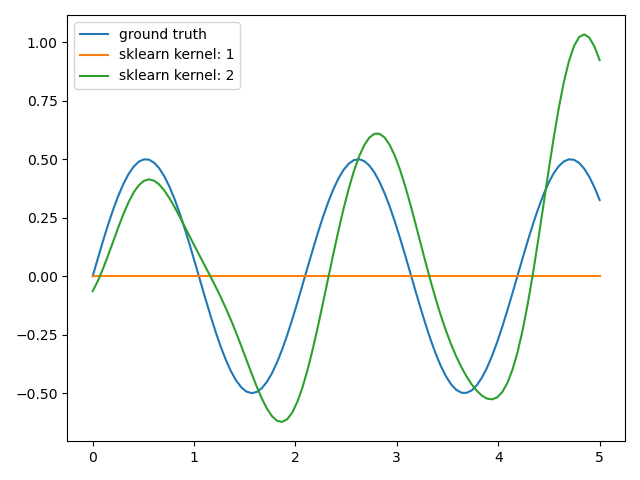

In [3]:
Image(filename='plots/sklearn_kernel.png') 

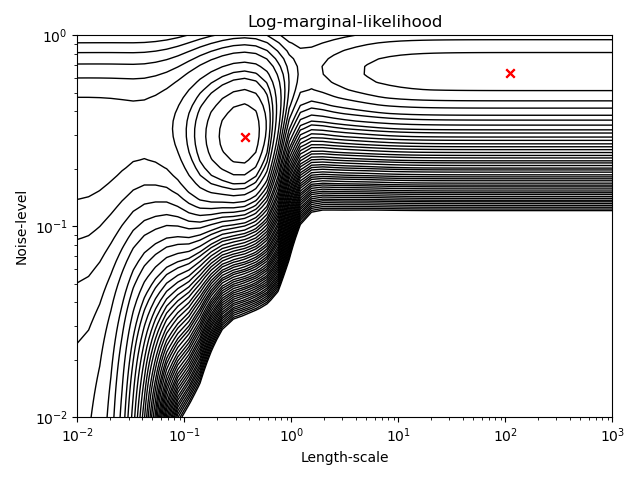

In [4]:
Image(filename='plots/sklearn_lml.png') 

In [5]:
!python sklearn_with_hgdl.py

HGDL -----------------------------------------------------------
gp - HGDL ( 1 ):  GaussianProcessRegressor(alpha=0.0,
                         kernel=0.64**2 * RBF(length_scale=0.365) + WhiteKernel(noise_level=0.294),
                         random_state=42) 
kernel: 0.64**2 * RBF(length_scale=0.365) + WhiteKernel(noise_level=0.294)
theta: [-0.89335668 -1.00663656 -1.22409386] [0.40927963 0.36544607 0.29402401]
likelihood: -21.805090890122035
gp - HGDL ( 2 ):  GaussianProcessRegressor(alpha=0.0,
                         kernel=0.523**2 * RBF(length_scale=0.0103) + WhiteKernel(noise_level=0.363),
                         random_state=42) 
kernel: 0.523**2 * RBF(length_scale=0.0103) + WhiteKernel(noise_level=0.363)
theta: [-1.29547598 -4.57638168 -1.01224581] [0.27376753 0.01029207 0.36340193]
likelihood: -23.86915828705175
gp - HGDL ( 3 ):  GaussianProcessRegressor(alpha=0.0,
                         kernel=0.519**2 * RBF(length_scale=0.0103) + WhiteKernel(noise_level=0.368),
        

In [6]:
import pickle

In [7]:
with open('data/GPs.pkl', 'rb') as file:
    GPs = pickle.load(file)

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [12]:
from matplotlib.colors import LogNorm

gp - sklearn ( 1 ):  GaussianProcessRegressor(alpha=0.0001,
                         kernel=0.64**2 * RBF(length_scale=0.365) + WhiteKernel(noise_level=0.294),
                         random_state=42) 
kernel: 0.64**2 * RBF(length_scale=0.365) + WhiteKernel(noise_level=0.294)
theta: [-0.89335668 -1.00663656 -1.22409386] [0.40927963 0.36544607 0.29402401]
likelihood: -21.805090890122035
gp - sklearn ( 2 ):  GaussianProcessRegressor(alpha=0.0,
                         kernel=0.523**2 * RBF(length_scale=0.0103) + WhiteKernel(noise_level=0.363),
                         random_state=42) 
kernel: 0.523**2 * RBF(length_scale=0.0103) + WhiteKernel(noise_level=0.363)
theta: [-1.29547598 -4.57638168 -1.01224581] [0.27376753 0.01029207 0.36340193]
likelihood: -23.86915828705175
gp - sklearn ( 3 ):  GaussianProcessRegressor(alpha=0.0,
                         kernel=0.519**2 * RBF(length_scale=0.0103) + WhiteKernel(noise_level=0.368),
                         random_state=42) 
kernel: 0.519**2 *

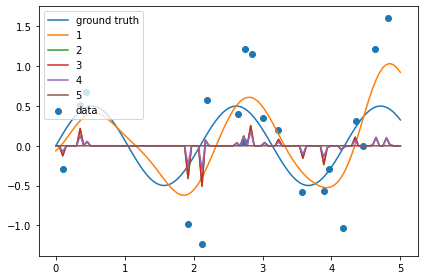

In [27]:
rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 20)[:, np.newaxis]
y = 0.5 * np.sin(3 * X[:, 0]) + rng.normal(0, 0.5, X.shape[0])

plt.figure()
plt.scatter(X, y, label='data')
X_ = np.linspace(0, 5, 100)
#plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9, label='ground truth')
plt.plot(X_, 0.5*np.sin(3*X_), label='ground truth')

for i, gp in enumerate(GPs):
    # First run
    print('gp - sklearn (',i+1,'): ', gp, '\nkernel:', gp.kernel_)
    print('theta:', gp.kernel_.theta, np.exp(gp.kernel_.theta))
    print('likelihood:', gp.log_marginal_likelihood_value_)


    y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
    #plt.plot(X_, y_mean, 'k', lw=3, zorder=9, label='sklearn kernel: '+str(i+1))
    plt.plot(X_, y_mean, label=str(i+1))

plt.legend()
plt.tight_layout()


In [71]:
GPs

[GaussianProcessRegressor(alpha=0.0001,
                          kernel=0.64**2 * RBF(length_scale=0.365) + WhiteKernel(noise_level=0.294),
                          random_state=42),
 GaussianProcessRegressor(alpha=0.0,
                          kernel=0.523**2 * RBF(length_scale=0.0103) + WhiteKernel(noise_level=0.363),
                          random_state=42),
 GaussianProcessRegressor(alpha=0.0,
                          kernel=0.519**2 * RBF(length_scale=0.0103) + WhiteKernel(noise_level=0.368),
                          random_state=42),
 GaussianProcessRegressor(alpha=0.0,
                          kernel=0.398**2 * RBF(length_scale=0.0123) + WhiteKernel(noise_level=0.479),
                          random_state=42),
 GaussianProcessRegressor(alpha=0.0,
                          kernel=0.00375**2 * RBF(length_scale=0.0232) + WhiteKernel(noise_level=0.637),
                          random_state=42)]

In [72]:
GPs = GPs[:2] + GPs[3:]

In [88]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

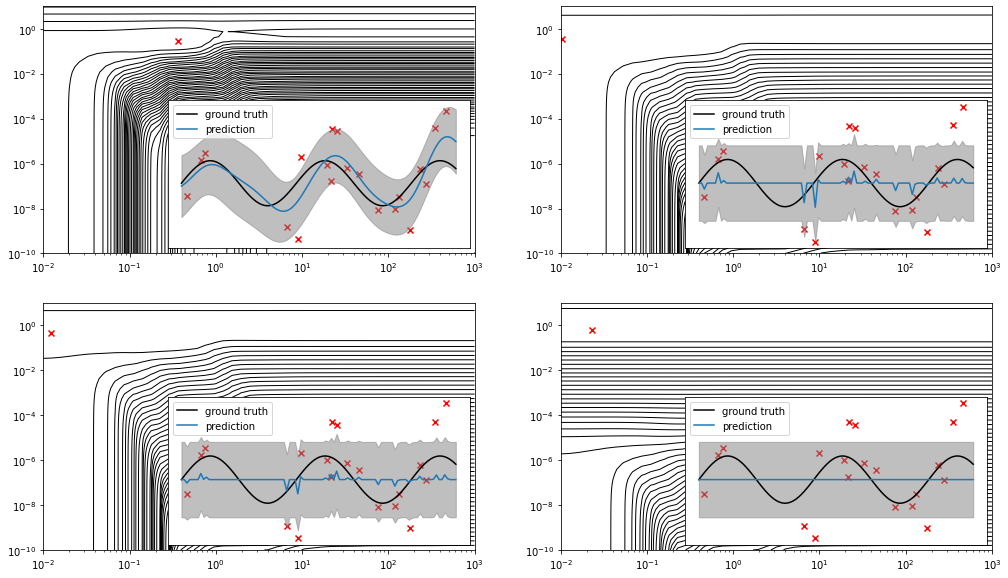

In [108]:
fig, ax = plt.subplots(2,2, figsize=(17,10))
plt.title('Log Marginal Likelihood Surfaces with Prediction')
for i, gp in enumerate(GPs):
    ax = plt.subplot(2,2,i+1)
    plt.scatter(np.exp(gp.kernel_.theta[1]), np.exp(gp.kernel_.theta[2]), c='red', marker='x')

    a, b = gp.kernel_.bounds[1:]
    theta0 = np.linspace(a[0], a[1], 49)
    theta1 = np.linspace(b[0], b[1], 50)
    Theta0, Theta1 = np.meshgrid(theta0, theta1)
    LML = np.empty(Theta0.shape)
    for i in range(Theta0.shape[0]):
        for j in range(Theta0.shape[1]):
            try:
                LML[i,j] = gp.log_marginal_likelihood(np.array([gp.kernel_.theta[0], Theta0[i, j], Theta1[i, j]]))
            except:
                raise
                pass
    #LML = np.array(LML).T
    vmin, vmax = (-LML).min(), (-LML).max()
    level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
    plt.contour(np.exp(Theta0), np.exp(Theta1), -LML,
                levels=level, colors='black', linewidths=1., norm=LogNorm(vmin=vmin, vmax=vmax))
    plt.yscale('log')
    plt.xscale('log')
    subAx = inset_axes(ax,
                    width="70%", # width = 30% of parent_bbox
                    height="60%", # height : 1 inch
                    loc='lower right')
    subAx.plot(X_, 0.5*np.sin(3*X_), color='black', label='ground truth')
    y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
    subAx.plot(X_, y_mean, label='prediction')
    
    subAx.scatter(X, y, color='red', marker='x')
    subAx.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='grey')
    subAx.set_xticks([])
    subAx.set_xticks([], minor=True)
    subAx.set_yticks([])
    subAx.set_yticks([], minor=True)
    
    subAx.legend()
plt.savefig('data/hgdl_plot')